# Chapter 4: NumPy Basics: Arrays and Vectorized Computation

In [3]:
import numpy as np

## Dataset:80 Cereals - Nutrition data on 80cereal products

The data file can be downloaded from [Kaggle.com](https://www.kaggle.com/crawford/80-cereals)

>If you like to eat cereal, do yourself a favor and avoid this dataset at all costs. After seeing these data it will never be the same for me to eat Fruity Pebbles again. - Kaggle

- Download the zip file from Kaggle (login required)
- Unzip to get `cereal.csv` file
- Move the csv file to a proper folder
- Open the csv file using notepad and excel to examine its content

In [4]:
import os
os.getcwd()
os.listdir('C:/Users/Emeka Bazor/Documents/GitHub/ds_coursework_python/cmp_464')
# my cereal file can be accessed as "Data/cereals/cereal.csv"

['.ipynb_checkpoints', 'cereal.csv', 'week1.ipynb', 'week2.ipynb']

In [5]:
# Load the csv file with np.loadtxt()
# Spoiler alert: in the next chapter we will learn a more user-friendly
# way of loading data.

# How to use np.loadtxt()?
# ?np.loadtxt() # Display documentation
# ??np.loadtxt() # Display source code

In [6]:
# Try an example from documentation
from io import StringIO 
c = StringIO(u"0 1\n2 3")
np.loadtxt(c)

array([[0., 1.],
       [2., 3.]])

In [8]:
# Load cereal.csv as a numpy array named raw_data
raw_data = np.loadtxt("cereal.csv",
                      dtype=str,
                      delimiter=",")
print(raw_data[0, :])

['name' 'mfr' 'type' 'calories' 'protein' 'fat' 'sodium' 'fiber' 'carbo'
 'sugars' 'potass' 'vitamins' 'shelf' 'weight' 'cups' 'rating']


In [9]:
# What is the shape of raw_data?
print("Shape:", raw_data.shape)

Shape: (78, 16)


In [10]:
# Create a list of feature names (call it feature_names)
feature_names = raw_data[0, :]
# print("Feature names:", raw_data[0, :])

# Print a list in a nicer format:
# Create a string that joins all values from the array
feature_string = ", ".join(feature_names)
print(feature_string)

name, mfr, type, calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, shelf, weight, cups, rating


In [11]:
# Assign the rest to data
data = raw_data[1:, :]

# Print the shape of data
print("Shape of data:", data.shape)

Shape of data: (77, 16)


### Content
What are the features?

- Name: Name of cereal
- mfr: Manufacturer of cereal
    - A = American Home Food Products;
    - G = General Mills
    - K = Kelloggs
    - N = Nabisco
    - P = Post
    - Q = Quaker Oats
    - R = Ralston Purina
- type:
    - cold
    - hot
- calories: calories per serving
- protein: grams of protein
- fat: grams of fat
- sodium: milligrams of sodium
- fiber: grams of dietary fiber
- carbo: grams of complex carbohydrates
- sugars: grams of sugars
- potass: milligrams of potassium
- vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
- shelf: display shelf (1, 2, or 3, counting from the floor)
- weight: weight in ounces of one serving
- cups: number of cups in one serving
- rating: a rating of the cereals (Possibly from Consumer Reports?)

Next, let's examine some important features

In [41]:
# ---------Names------------
# Display the list of cereal names
print("\n".join(data[:, 0]))

100% Bran
100% Natural Bran
All-Bran
All-Bran with Extra Fiber
Almond Delight
Apple Cinnamon Cheerios
Apple Jacks
Basic 4
Bran Chex
Bran Flakes
Cap'n'Crunch
Cheerios
Cinnamon Toast Crunch
Clusters
Cocoa Puffs
Corn Chex
Corn Flakes
Corn Pops
Count Chocula
Cracklin' Oat Bran
Cream of Wheat (Quick)
Crispix
Crispy Wheat & Raisins
Double Chex
Froot Loops
Frosted Flakes
Frosted Mini-Wheats
Fruit & Fibre Dates; Walnuts; and Oats
Fruitful Bran
Fruity Pebbles
Golden Crisp
Golden Grahams
Grape Nuts Flakes
Grape-Nuts
Great Grains Pecan
Honey Graham Ohs
Honey Nut Cheerios
Honey-comb
Just Right Crunchy  Nuggets
Just Right Fruit & Nut
Kix
Life
Lucky Charms
Maypo
Muesli Raisins; Dates; & Almonds
Muesli Raisins; Peaches; & Pecans
Mueslix Crispy Blend
Multi-Grain Cheerios
Nut&Honey Crunch
Nutri-Grain Almond-Raisin
Nutri-grain Wheat
Oatmeal Raisin Crisp
Post Nat. Raisin Bran
Product 19
Puffed Rice
Puffed Wheat
Quaker Oat Squares
Quaker Oatmeal
Raisin Bran
Raisin Nut Bran
Raisin Squares
Rice Chex
Rice Kr

In [48]:
# How to sort an numpy array?
ary = np.array([1, 3, 2, 7, 5])
print(ary)
# ary = np.sort(ary)
ary.sort()
print(ary)

[1 3 2 7 5]
[1 2 3 5 7]


In [53]:
matrix = np.array([[1, 4, 23, 19], 
                   [5, 2, 6, -20]])
print(matrix)
print("sorting each row:")
print(np.sort(matrix, axis=1)) # or: np.sort(matrix)
print("sorting each column:")
print(np.sort(matrix, axis=0))

[[  1   4  23  19]
 [  5   2   6 -20]]
sorting each row:
[[  1   4  19  23]
 [-20   2   5   6]]
sorting each column:
[[  1   2   6 -20]
 [  5   4  23  19]]


In [58]:
# The names are nicely sorted. How to sort an array?

# To make an example, let's shuffle the array first
name_data = np.array(data[:, 0])
example = np.array(name_data)
np.random.shuffle(example)
print("\n".join(example))

Maypo
Froot Loops
Fruitful Bran
Just Right Fruit & Nut
Multi-Grain Cheerios
Honey-comb
Shredded Wheat
Cocoa Puffs
Shredded Wheat spoon size
Corn Flakes
Kix
100% Bran
Double Chex
All-Bran with Extra Fiber
Clusters
Grape-Nuts
Muesli Raisins; Peaches; & Pecans
Fruit & Fibre Dates; Walnuts; and Oats
All-Bran
Wheaties
Puffed Wheat
Crispy Wheat & Raisins
Just Right Crunchy  Nuggets
Lucky Charms
Total Raisin Bran
Shredded Wheat 'n'Bran
Basic 4
Fruity Pebbles
Nut&Honey Crunch
Count Chocula
Raisin Squares
Post Nat. Raisin Bran
Mueslix Crispy Blend
Raisin Nut Bran
Apple Cinnamon Cheerios
Bran Flakes
Golden Crisp
Rice Chex
Wheat Chex
Honey Nut Cheerios
Honey Graham Ohs
Life
Frosted Flakes
Product 19
Cinnamon Toast Crunch
Grape Nuts Flakes
Raisin Bran
Apple Jacks
Cheerios
Cream of Wheat (Quick)
Muesli Raisins; Dates; & Almonds
Almond Delight
Puffed Rice
Total Corn Flakes
Golden Grahams
Triples
Wheaties Honey Gold
Special K
Frosted Mini-Wheats
Nutri-grain Wheat
Quaker Oat Squares
Cracklin' Oat Bran

In [63]:
# Now use sort() to sort the array
# print(np.sort(example)) # this creates a new sorted list
example.sort()
print(example)# this will sort the list itself

['100% Bran' '100% Natural Bran' 'All-Bran' 'All-Bran with Extra Fiber'
 'Almond Delight' 'Apple Cinnamon Cheerios' 'Apple Jacks' 'Basic 4'
 'Bran Chex' 'Bran Flakes' "Cap'n'Crunch" 'Cheerios'
 'Cinnamon Toast Crunch' 'Clusters' 'Cocoa Puffs' 'Corn Chex'
 'Corn Flakes' 'Corn Pops' 'Count Chocula' "Cracklin' Oat Bran"
 'Cream of Wheat (Quick)' 'Crispix' 'Crispy Wheat & Raisins' 'Double Chex'
 'Froot Loops' 'Frosted Flakes' 'Frosted Mini-Wheats'
 'Fruit & Fibre Dates; Walnuts; and Oats' 'Fruitful Bran' 'Fruity Pebbles'
 'Golden Crisp' 'Golden Grahams' 'Grape Nuts Flakes' 'Grape-Nuts'
 'Great Grains Pecan' 'Honey Graham Ohs' 'Honey Nut Cheerios' 'Honey-comb'
 'Just Right Crunchy  Nuggets' 'Just Right Fruit & Nut' 'Kix' 'Life'
 'Lucky Charms' 'Maypo' 'Muesli Raisins; Dates; & Almonds'
 'Muesli Raisins; Peaches; & Pecans' 'Mueslix Crispy Blend'
 'Multi-Grain Cheerios' 'Nut&Honey Crunch' 'Nutri-Grain Almond-Raisin'
 'Nutri-grain Wheat' 'Oatmeal Raisin Crisp' 'Post Nat. Raisin Bran'
 'Product

In [64]:
feature_names

array(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium',
       'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf',
       'weight', 'cups', 'rating'], dtype='<U38')

In [80]:
my_data = np.array([[1, 2, 13],
                    [4, 5, 6],
                    [7, 8, 9]])
last_col = my_data[:, 2]
last_col.sort()
print(last_col)
print(my_data)

[ 6  9 13]
[[ 1  2  6]
 [ 4  5  9]
 [ 7  8 13]]


In [85]:
# ------------- ratings ------------
# What is the index of rating in feature_names?
print(np.where(feature_names == "rating"))
rating_data = np.array(data[:, 15]) # create a new numpy array with ratings
# print(rating_data)
# print(rating_data.dtype)
# change the data type from string to float
rating_data = rating_data.astype(float)
print(rating_data)
# rating_data_int = rating_data.astype(int)
# print(rating_data_int)

# Find the maximum rating
print("maximum rating:", np.max(rating_data))
print("minimum rating:", np.min(rating_data))
print("average rating:", np.mean(rating_data))

highest_rating = np.max(rating_data)

# Find the index corresponding to the highest rating
highest_rating_index = np.where(rating_data == highest_rating)
print(highest_rating_index)
print("Product with highest rating:", data[3, 0])

lowest_rating = np.min(rating_data)

lowest_rating_i = np.where(rating_data == lowest_rating)
print(lowest_rating_i)
print(data[10,0])
# Sort the ratings using sort() and argsort()



# Find the top five highest-rated cereal products



# Find the top five lowest-rated cereal products




(array([15], dtype=int64),)
[68.402973 33.983679 59.425505 93.704912 34.384843 29.509541 33.174094
 37.038562 49.120253 53.313813 18.042851 50.764999 19.823573 40.400208
 22.736446 41.445019 45.863324 35.782791 22.396513 40.448772 64.533816
 46.895644 36.176196 44.330856 32.207582 31.435973 58.345141 40.917047
 41.015492 28.025765 35.252444 23.804043 52.076897 53.371007 45.811716
 21.871292 31.072217 28.742414 36.523683 36.471512 39.241114 45.328074
 26.734515 54.850917 37.136863 34.139765 30.313351 40.105965 29.924285
 40.69232  59.642837 30.450843 37.840594 41.50354  60.756112 63.005645
 49.511874 50.828392 39.259197 39.7034   55.333142 41.998933 40.560159
 68.235885 74.472949 72.801787 31.230054 53.131324 59.363993 38.839746
 28.592785 46.658844 39.106174 27.753301 49.787445 51.592193 36.187559]
maximum rating: 93.704912
minimum rating: 18.042851
average rating: 42.66570498701299
(array([3], dtype=int64),)
Product with highest rating: All-Bran with Extra Fiber
(array([10], dtype=int

In [ ]:
# ------------- sugars -------------
# What is the index of sugars in feature_names?



# Is there any correlation between sugars and rating?
import matplotlib.pyplot as plt
%matplotlib inline
# plt.plot(original_ratings, sugars_data)

# change data type from str to float
rating_data = original_ratings.astype(float)
sugars_data = sugars_data.astype(float)
# plt.plot(rating_data, sugars_data)

# sort the ratings data (sugars data should be changed accordingly, how?)
order = rating_data.argsort()
print("order:", order)
plt.plot(rating_data[order], sugars_data[order], 'b.')


In [ ]:
# ------------- Weight -------------
# What is the index of weight in feature_names?



# How many different weights per serving are there?




## Measure nutrition by serving

The following project is inspired by [This Kaggle kernel](https://www.kaggle.com/frankwwu/how-cereal-manufacturers-mislead-consumers)

Manufacturers like to measure nutrition with serving. Every manufacturer chaotically defines the serving with different weights and cups. Thus, for consumers, comparing nutrition measured with different serving is very confusing in practice. Imagine you are comparing nutrition facts of different cereals in a grocery store and they are measured with different serving, you definitely need a calculator and a piece of paper.

In [ ]:
# Divide sugars by weight



#### Arithmetic with NumPy arrays

In [ ]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr
arr * arr
arr - arr

In [ ]:
1 / arr
arr ** 0.5

In [ ]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2
arr2 > arr

In [1]:
# Plot ratings vs. unified_sugars_data




In [ ]:
# What is the maximum and minimum amount of sugar in a unified serving?




### Create our own ratings

- good-cereal-rating = protein + fiber + vitamins
- bad-cereal-rating = fat + sodium + potass + sugars

In [ ]:
good_rating = data[:, 4].astype(float) + data[:, 7].astype(float) + data[:, 11].astype(float)
print(good_rating)

In [ ]:
plt.plot(rating_data, good_rating, 'b.')

# Week 2 Homework
1. Fat
    - Calculate fat per gram
    - What is the maximum and minimum value for fat per gram?
2. Calories
    - Calculate calories per gram
    - find the top 5 cereals with highest calories
    - find the top 5 cereals with lowest calories
3. Bad rating
    - Calculate bad-cereal-rating for each cereal
    - Plot Ratings vs. Bad-Cereal-Ratings.
    - Do they agree each other?

In [2]:
import numpy as np
cereal = np.loadtxt("C:/Users/Emeka Bazor/Documents/GitHub/ds_coursework_python/cmp_464/cereal.csv",
                    dtype = str,
                    delimiter = ",")

cereal_columns = cereal[0,:]
print(", ".join(cereal_columns))

cereal_data = cereal[1:,:]

name, mfr, type, calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, shelf, weight, cups, rating


1)

In [23]:
print(np.where(cereal_columns == "fat"))
print(np.where(cereal_columns == "weight"))

fat = cereal_data[:,5]
ounces = cereal_data[:,13]

fat = fat.astype(float)
ounces = ounces.astype(float)
grams = ounces * 28.3495

fat_per_gram = fat / grams

print("\nFat Per Gram")
print("------------")
for element in fat_per_gram:
        print("%.2f" % (element))




(array([5], dtype=int64),)
(array([13], dtype=int64),)

Fat Per Gram
------------
0.04
0.18
0.04
0.00
0.07
0.07
0.00
0.05
0.04
0.00
0.07
0.07
0.11
0.07
0.04
0.00
0.00
0.00
0.04
0.11
0.00
0.00
0.04
0.00
0.04
0.00
0.00
0.06
0.00
0.04
0.00
0.04
0.04
0.00
0.11
0.07
0.04
0.00
0.04
0.03
0.04
0.07
0.04
0.04
0.11
0.11
0.05
0.04
0.04
0.05
0.00
0.06
0.03
0.00
0.00
0.00
0.04
0.07
0.03
0.07
0.00
0.00
0.00
0.00
0.00
0.00
0.04
0.00
0.00
0.04
0.02
0.04
0.04
0.04
0.04
0.04
0.04


In [29]:
print("max: %.2f" % np.max(fat_per_gram))
print("min: %.2f" % np.min(fat_per_gram))

max: 0.18
min: 0.00


2)

In [31]:
print(np.where(cereal_columns == "calories"))
print(np.where(cereal_columns == "weight"))

calories = cereal_data[:,3]
calories = calories.astype(float)



calories_per_gram = calories / grams

print("\nCalories Per Gram")
print("------------")
for element in calories_per_gram:
        print("%.2f" % (element))


(array([3], dtype=int64),)
(array([13], dtype=int64),)

Calories Per Gram
------------
2.47
4.23
2.47
1.76
3.88
3.88
3.88
3.45
3.17
3.17
4.23
3.88
4.23
3.88
3.88
3.88
3.53
3.88
3.88
3.88
3.53
3.88
3.53
3.53
3.88
3.88
3.53
3.39
3.18
3.88
3.53
3.88
3.53
3.88
4.23
4.23
3.88
3.88
3.88
3.80
3.88
3.53
3.88
3.53
5.29
5.29
3.76
3.53
4.23
3.71
3.17
3.67
3.18
3.53
3.53
3.53
3.53
3.53
3.18
3.53
3.17
3.88
3.88
3.40
3.17
3.17
3.88
3.88
3.17
3.88
3.29
3.53
3.88
3.88
3.53
3.53
3.88


In [50]:
calories = calories.astype(int)
cereal_names = cereal_data[:,0]


sorted_indexes_calories = calories.argsort()
min_calories = sorted_indexes_calories[0:5]
print("5 cereals with the lowest calories: ", "|| ".join(cereal_names[min_calories]))

reverse_calories = sorted_indexes_calories[::-1]
max_calories = reverse_calories[0:5]
print("5 cereals with the highest calories: ", "|| ".join(cereal_names[max_calories]))

5 cereals with the lowest calories:  All-Bran with Extra Fiber|| Puffed Rice|| Puffed Wheat|| 100% Bran|| All-Bran
5 cereals with the highest calories:  Mueslix Crispy Blend|| Muesli Raisins; Peaches; & Pecans|| Muesli Raisins; Dates; & Almonds|| Just Right Fruit & Nut|| Nutri-Grain Almond-Raisin


3)

rating index: (array([15], dtype=int64),)
fat index:  (array([5], dtype=int64),)
sodium index (array([6], dtype=int64),)
potass index (array([10], dtype=int64),)
sugars index (array([9], dtype=int64),)


Bad Cereal Ratings
------------------
417
163
586
470
209
262
169
320
332
405
269
398
267
254
249
308
327
122
259
310
79
253
271
275
169
236
107
372
442
173
100
335
231
263
182
278
351
226
237
275
304
253
248
99
279
334
325
317
240
359
262
302
475
368
15
50
252
111
463
290
116
272
328
95
140
120
126
288
110
239
435
314
314
178
349
314
269


Text(0, 0.5, 'Bad Cereal Ratings')

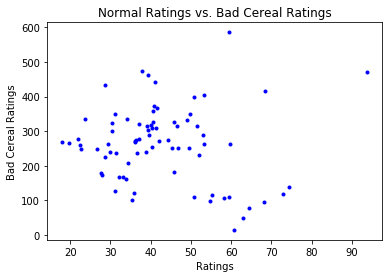

In [33]:
# bad-cereal-rating = fat + sodium + potass + sugars

rating = cereal_data[:,15].astype(float)

print("rating index:", np.where(cereal_columns == "rating"))
print("fat index: ", np.where(cereal_columns == "fat"))
print("sodium index", np.where(cereal_columns == "sodium"))
print("potass index", np.where(cereal_columns == "potass"))
print("sugars index", np.where(cereal_columns == "sugars"))
print("\n")

bad_cereal_rating = cereal_data[:,5].astype(int) + cereal_data[:,6].astype(int) + cereal_data[:,10].astype(int) + cereal_data[:,9].astype(int)

print("Bad Cereal Ratings")
print("------------------")
for element in bad_cereal_rating:
    print(element)

import matplotlib.pyplot as plt
%matplotlib inline

order = cereal_data.argsort()
plt.plot(rating, bad_cereal_rating,".b")
plt.title("Normal Ratings vs. Bad Cereal Ratings")
plt.xlabel("Ratings")
plt.ylabel("Bad Cereal Ratings")


There's no obvious correlation between normal ratings and bad ratings (some cereals with high normal ratings have high bad ratings and some cereals with high normal ratings have low bad ratings). So they don't really agree with each other. 